In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [290]:
pharma_data.shape

(23097, 18)

In [291]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [292]:
pharma_data.groupby(['Survived_1_year']).mean()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond
Survived_1_year,,,,,,,,,,,,,
0,16604.262303,26.500824,6281.149635,35.130563,24.063122,0.917388,0.158401,0.201779,0.12136,0.379676,0.052516,0.000000,1.831120
1,16511.655619,26.362117,6249.723824,32.092515,23.100994,0.886196,0.123105,0.175027,0.06093,0.401391,0.054412,0.000952,1.702014


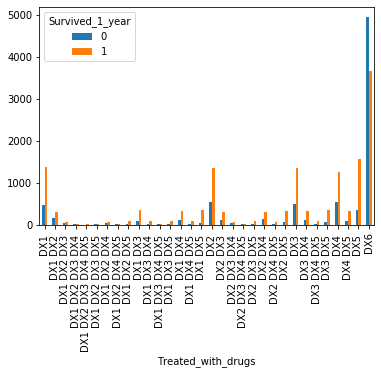

In [293]:
pd.crosstab(pharma_data.Treated_with_drugs,pharma_data.Survived_1_year).plot(kind='bar')

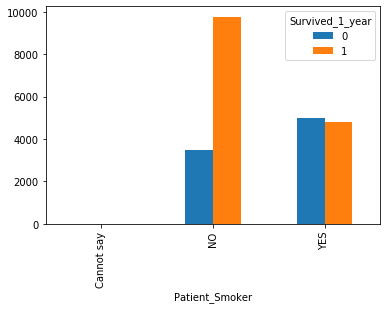

In [294]:
pd.crosstab(pharma_data.Patient_Smoker,pharma_data.Survived_1_year).plot(kind='bar')

In [295]:
pharma_data['Patient_Smoker'].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

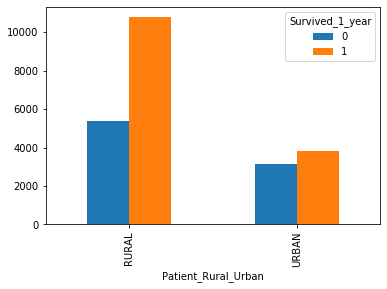

In [296]:
pd.crosstab(pharma_data.Patient_Rural_Urban,pharma_data.Survived_1_year).plot(kind='bar')

In [297]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pharma_data.Patient_Rural_Urban = le.fit_transform(pharma_data.Patient_Rural_Urban)

In [298]:
pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode().iloc[0],inplace= True)
pharma_data['A'].fillna(pharma_data['A'].mode().iloc[0],inplace= True)
pharma_data['B'].fillna(pharma_data['B'].mode().iloc[0],inplace= True)
pharma_data['C'].fillna(pharma_data['C'].mode().iloc[0],inplace= True)
pharma_data['D'].fillna(pharma_data['D'].mode().iloc[0],inplace= True)
pharma_data['E'].fillna(pharma_data['E'].mode().iloc[0],inplace= True)
pharma_data['F'].fillna(pharma_data['F'].mode().iloc[0],inplace= True)
pharma_data['Z'].fillna(pharma_data['Z'].mode().iloc[0],inplace= True)

In [299]:

pharma_data = pharma_data.drop(['Patient_mental_condition'],axis=1)

In [300]:
pharma_data['Number_of_prev_cond'] = pharma_data['A']+pharma_data['B']+pharma_data['C']+pharma_data['D']+pharma_data['E']+pharma_data['F']+pharma_data['Z']

In [301]:
dummies = pd.get_dummies(pharma_data['Treated_with_drugs'])
pharma_data = pd.concat([pharma_data,dummies],axis = 1)

In [302]:
pharma_data = pharma_data.drop('Treated_with_drugs',axis = 1)

In [303]:
pharma_data = pharma_data[pharma_data['Diagnosed_Condition'] != 0]

In [304]:
pharma_data.Patient_Smoker = le.fit_transform(pharma_data.Patient_Smoker)

In [305]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,...,DX2 DX4 DX5,DX2 DX5,DX3,DX3 DX4,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6
0,22374,8,3333,56,18.479385,1,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,1,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6283,23,10446,48,27.510027,1,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,0,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,10808,45,7977,47,26.155120,1,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [306]:
from sklearn.model_selection import train_test_split
X = pharma_data.drop('Survived_1_year',axis = 1)
y = pharma_data['Survived_1_year']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [307]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [308]:
from sklearn.ensemble import RandomForestClassifier
clf_1 = RandomForestClassifier(min_samples_leaf=2, random_state=9)


In [309]:
from sklearn.model_selection import GridSearchCV

criterion = ['gini', 'entropy']        

n_estimators = [100, 200, 300]       

max_features = ['auto', 'sqrt']       

max_depth = [10, 20]      

max_depth.append(None)    

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}


In [310]:
gs = GridSearchCV(clf_1, param_grid=params, n_jobs=2)

In [311]:
rf_grid = gs.fit(X_train, y_train) 

In [312]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [313]:
rf_grid.best_score_

0.8162668335637259

In [314]:
rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [315]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [316]:
y_pred = rf_model.predict(X_test)

In [317]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test,  y_pred))

F1 Score:  0.8508534056468336


In [320]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [321]:
test_new = test_new.drop('Patient_mental_condition',axis = 1)

In [322]:
test_new.Patient_Smoker = le.fit_transform(test_new.Patient_Smoker)
test_new.Patient_Rural_Urban = le.fit_transform(test_new.Patient_Rural_Urban)

In [323]:
dummies_1 = pd.get_dummies(test_new['Treated_with_drugs'])
test_new = pd.concat([test_new,dummies_1],axis = 1)

In [324]:
test_new = test_new.drop('Treated_with_drugs',axis = 1)

In [325]:
survive = rf_model.predict(test_new)

In [326]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,...,DX2 DX4 DX5,DX2 DX5,DX3,DX3 DX4,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6
0,19150,40,3709,16,29.443894,0,0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,23216,52,986,24,26.836321,0,1,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7149,32,3292,42,27.171155,0,1,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,0,0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [327]:
res = pd.DataFrame(survive)
res.index = test_new.index
res.columns = ['survive_1']
res.to_csv('prediction_results_liver_1.csv')